Data Source: United States Department of Transportation.

Department: Buraeu of transportation statistics

Data set name: Airline-On-time-data.csv

Subset of Data : From Date Janurary 2016 to January 2019 and at all major airports

https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?display=data&pn=1

### Outcome variable : Arrival delay in flights (arr_delay)

##### Data analysis question : What is the major factor for delay in flights ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [2]:
# Loading the data.
df = pd.read_csv('Airline-On-time-data.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10911 entries, 0 to 10915
Data columns (total 21 columns):
year                   10911 non-null int64
 month                 10911 non-null int64
carrier                10911 non-null object
carrier_name           10911 non-null object
airport                10911 non-null object
airport_name           10911 non-null object
arr_flights            10911 non-null float64
arr_del15              10911 non-null float64
carrier_ct             10911 non-null float64
 weather_ct            10911 non-null float64
nas_ct                 10911 non-null float64
security_ct            10911 non-null float64
late_aircraft_ct       10911 non-null float64
arr_cancelled          10911 non-null float64
arr_diverted           10911 non-null float64
 arr_delay             10911 non-null float64
 carrier_delay         10911 non-null float64
weather_delay          10911 non-null float64
nas_delay              10911 non-null float64
security_delay         10

In [3]:
df.head()
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2016,1,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",11956.0,1534.0,507.33,39.83,...,4.72,529.47,201.0,9.0,106950.0,50027.0,2842.0,13913.0,167.0,40001.0
1,2016,1,AA,American Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County",588.0,98.0,34.71,4.71,...,0.32,38.49,13.0,2.0,5170.0,1754.0,312.0,655.0,16.0,2433.0
2,2016,1,AA,American Airlines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",607.0,92.0,35.52,5.40,...,0.00,27.52,12.0,2.0,4485.0,1857.0,198.0,715.0,0.0,1715.0
3,2016,1,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1595.0,335.0,117.00,10.26,...,0.83,89.25,137.0,6.0,23698.0,9681.0,1592.0,4371.0,18.0,8036.0
4,2016,1,AA,American Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",4664.0,607.0,198.83,16.75,...,0.99,155.81,98.0,2.0,33906.0,12889.0,1357.0,9182.0,242.0,10236.0
5,2016,1,AA,American Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",4993.0,617.0,225.25,10.24,...,0.12,154.31,86.0,3.0,31060.0,14884.0,1003.0,6267.0,5.0,8901.0
6,2016,1,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3192.0,611.0,231.06,17.86,...,1.29,168.84,74.0,2.0,37701.0,17618.0,1351.0,6832.0,36.0,11864.0
7,2016,1,AA,American Airlines Inc.,MCO,"Orlando, FL: Orlando International",1639.0,409.0,143.71,13.08,...,1.09,92.72,55.0,2.0,19038.0,8099.0,676.0,4865.0,35.0,5363.0
8,2016,1,AA,American Airlines Inc.,DEN,"Denver, CO: Denver International",818.0,139.0,60.69,3.57,...,0.18,46.26,14.0,0.0,7423.0,3531.0,213.0,816.0,3.0,2860.0
9,2016,1,AA,American Airlines Inc.,MIA,"Miami, FL: Miami International",4628.0,1222.0,335.41,31.03,...,7.77,245.41,135.0,42.0,74959.0,28660.0,3960.0,21886.0,307.0,20146.0


In [4]:
# Removing white space before the column names in the dataframe
df.columns = df.columns.str.lstrip()
print (df.columns)
# Taking a subset of data
df_subset = df.loc[:, ['month', 'carrier_name','airport', 'arr_flights','arr_delay','carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay',]].dropna()
df_subset.head()

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


,month,carrier_name,airport,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,American Airlines Inc.,DFW,11956.0,106950.0,50027.0,2842.0,13913.0,167.0,40001.0
1,1,American Airlines Inc.,DTW,588.0,5170.0,1754.0,312.0,655.0,16.0,2433.0
2,1,American Airlines Inc.,SEA,607.0,4485.0,1857.0,198.0,715.0,0.0,1715.0
3,1,American Airlines Inc.,JFK,1595.0,23698.0,9681.0,1592.0,4371.0,18.0,8036.0
4,1,American Airlines Inc.,ORD,4664.0,33906.0,12889.0,1357.0,9182.0,242.0,10236.0


/Users/Sri/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


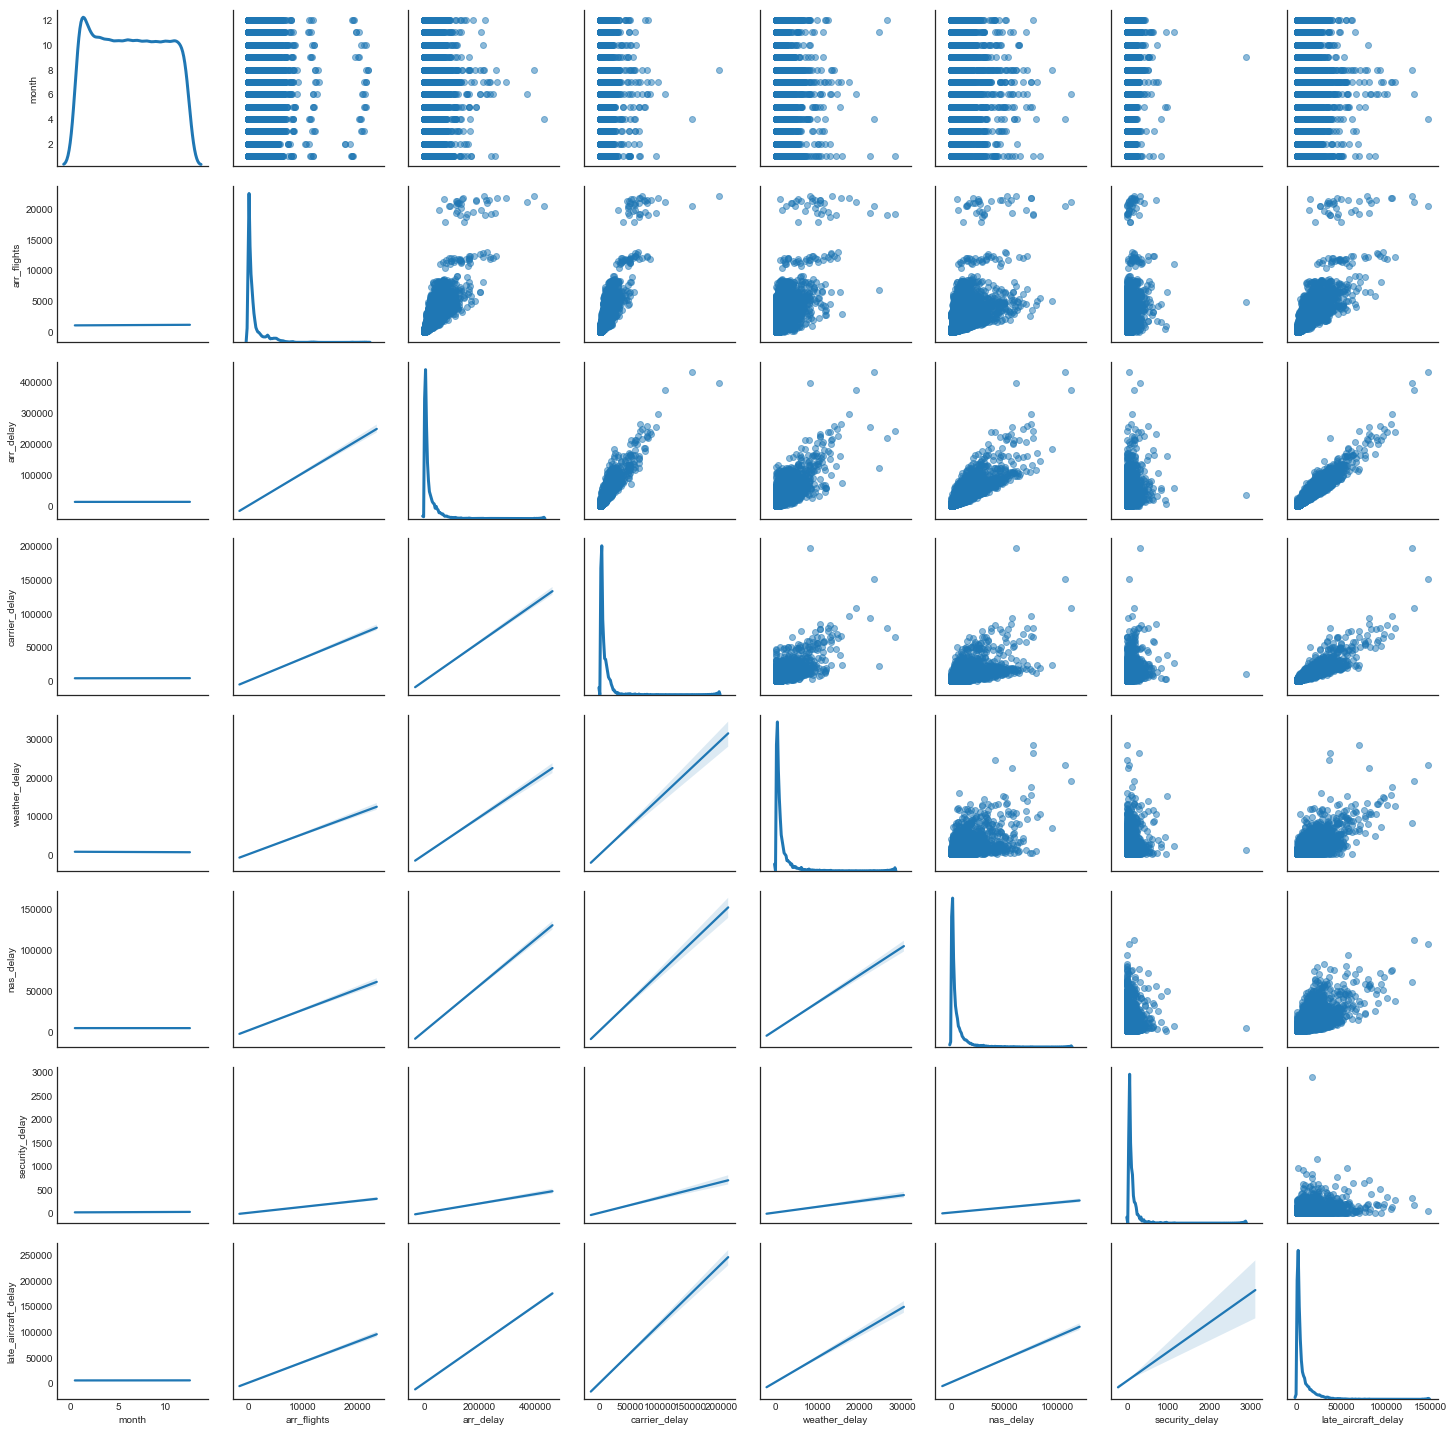

In [5]:
# Declare that you want to make a scatterplot matrix.

# First make a df with only numeric columns
df_num = df_subset.select_dtypes(include=[np.number]).dropna()

sns.set_style("white")
g = sns.PairGrid(df_num, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()


                        month  arr_flights  arr_delay  carrier_delay  \
month                1.000000     0.013646   0.001434       0.005400   
arr_flights          0.013646     1.000000   0.858837       0.891345   
arr_delay            0.001434     0.858837   1.000000       0.934598   
carrier_delay        0.005400     0.891345   0.934598       1.000000   
weather_delay       -0.024224     0.704987   0.795542       0.749301   
nas_delay           -0.001265     0.640852   0.867496       0.678283   
security_delay       0.044776     0.392293   0.373209       0.378849   
late_aircraft_delay  0.003919     0.840235   0.963562       0.909669   

                     weather_delay  nas_delay  security_delay  \
month                    -0.024224  -0.001265        0.044776   
arr_flights               0.704987   0.640852        0.392293   
arr_delay                 0.795542   0.867496        0.373209   
carrier_delay             0.749301   0.678283        0.378849   
weather_delay             

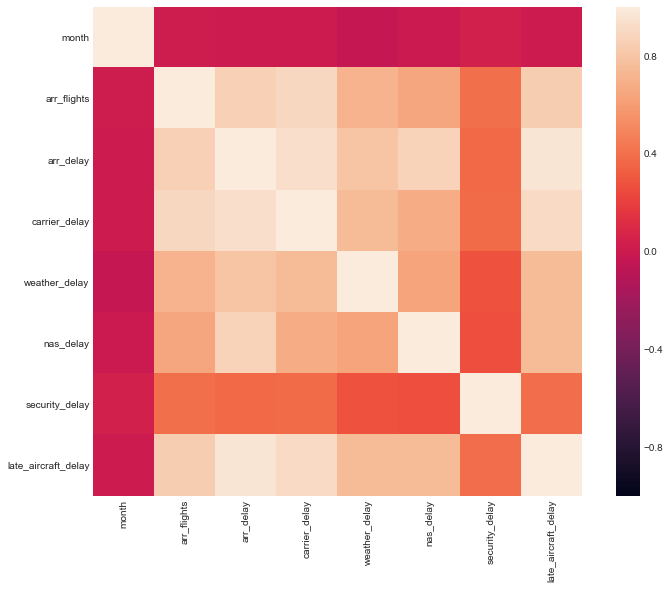

In [6]:
# Make the correlation matrix.
corrmat = df_num.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1.0, vmin=-1.0, square=True)
plt.show()

In [7]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

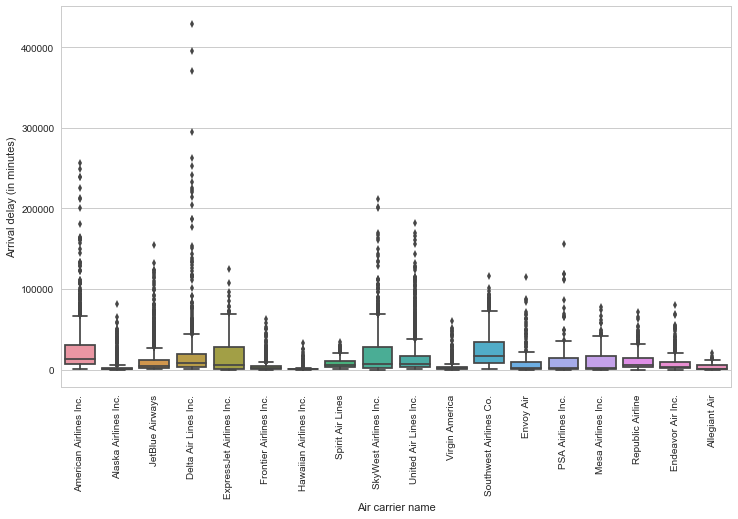

In [8]:
# Arrival delay across carriers with boxplot
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
g=sns.boxplot(data=df_subset, x="carrier_name", y="arr_delay")
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.xlabel('Air carrier name')
plt.ylabel('Arrival delay (in minutes)')
plt.show()

In [9]:
stats.mstats.winsorize(df_subset['arr_delay'], inplace=True, limits = 0.02)

masked_array(data = [ 83986.   5170.   4485. ...,  22539.   5877.    111.],
             mask = False,
       fill_value = 1e+20)

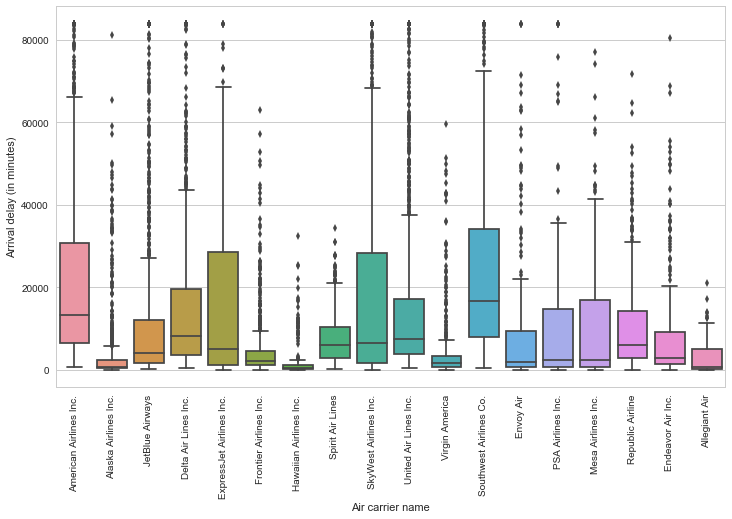

In [10]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
g=sns.boxplot(data=df_subset, x="carrier_name", y="arr_delay")
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.xlabel('Air carrier name')
plt.ylabel('Arrival delay (in minutes)')
plt.show()

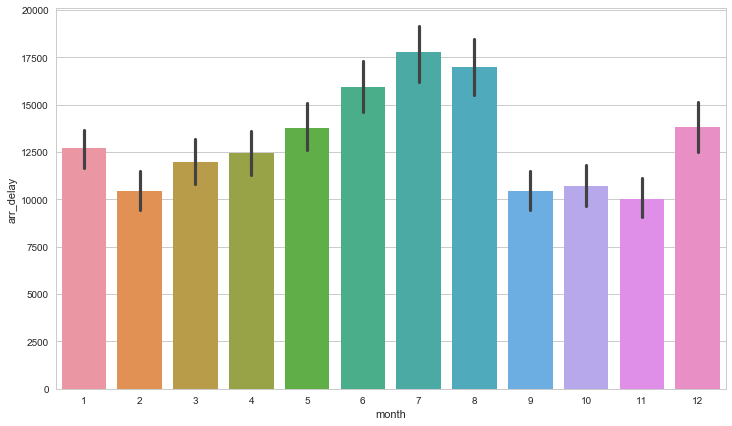

In [11]:
# Months and arr delays relationship
sns.barplot(x='month', y='arr_delay', data=df_subset)
plt.show()

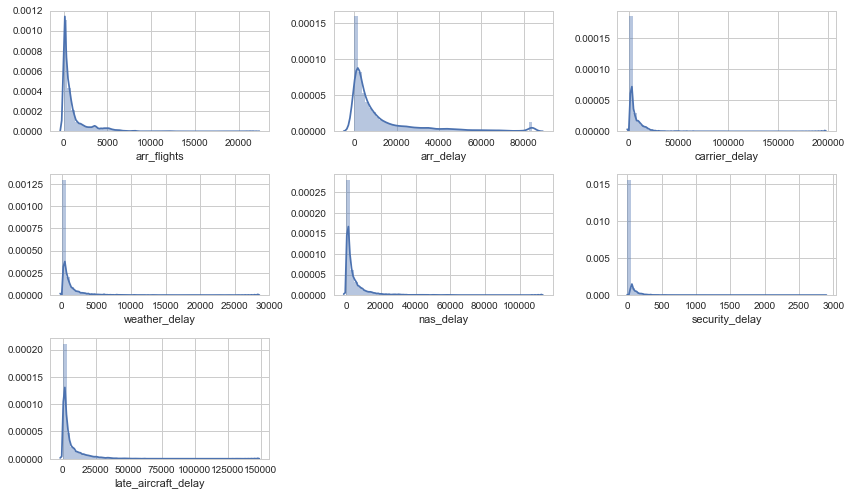

In [12]:
# Making a histogram of all columns in the dataframe subset.

fig = plt.figure()
for i in range (1, len(df_num.columns)):
    fig.add_subplot(int(str(33)+str(i)))
    sns.distplot(df_subset[df_num.columns[i]])
plt.tight_layout()
plt.show()

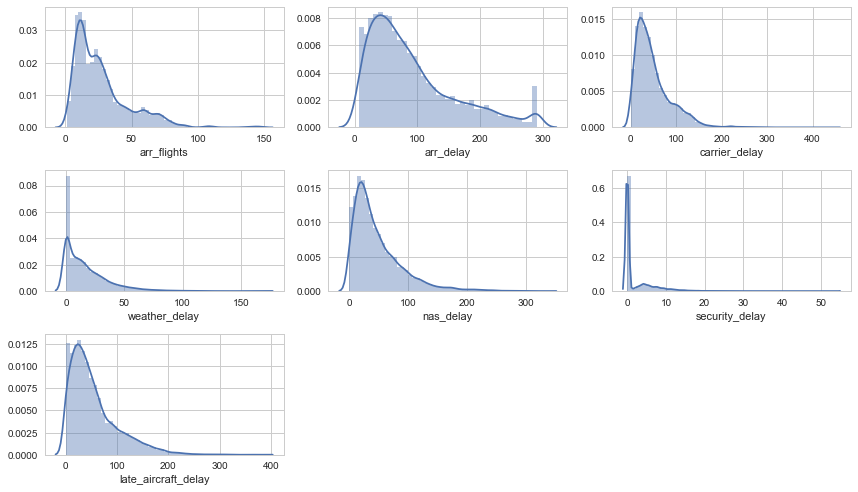

In [13]:
# Making a histogram of all columns in the dataframe subset.
fig = plt.figure()
for i in range (1, len(df_num.columns)):
    fig.add_subplot(int(str(33)+str(i)))
    sns.distplot(np.sqrt(df_subset[df_num.columns[i]].dropna()))
plt.tight_layout()
plt.show()

In [14]:
# The outcome variable arr_delay is in minutes and hard to comprehend the delay in minutes in thousands...
# New feature added with time in hours....so converting into hours .
time_list=[]
for value in df_subset['arr_delay']:
    try:
        time_list.append(pd.Timedelta(value, unit='m'))
    except ValueError:
        time_list.append(np.nan)
df_subset['arr_delay_hours_days']=pd.DataFrame(time_list)
df_subset.head()

,month,carrier_name,airport,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_hours_days
0,1,American Airlines Inc.,DFW,11956.0,83986.0,50027.0,2842.0,13913.0,167.0,40001.0,58 days 07:46:00
1,1,American Airlines Inc.,DTW,588.0,5170.0,1754.0,312.0,655.0,16.0,2433.0,3 days 14:10:00
2,1,American Airlines Inc.,SEA,607.0,4485.0,1857.0,198.0,715.0,0.0,1715.0,3 days 02:45:00
3,1,American Airlines Inc.,JFK,1595.0,23698.0,9681.0,1592.0,4371.0,18.0,8036.0,16 days 10:58:00
4,1,American Airlines Inc.,ORD,4664.0,33906.0,12889.0,1357.0,9182.0,242.0,10236.0,23 days 13:06:00


In [15]:
# Arrival delay time is important if the value is in hours...since if it is more than 24 hours...usually customers 
# take another flights and not prefer to wait.

#New indicator feature added which can filter all rows which have less than a day delay in flight
df_subset['arr_delay_less_than_day'] = np.where((df_subset['arr_delay_hours_days'].dt.
                                                 days == 0), 1, 0)
df_subset.head()

,month,carrier_name,airport,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_hours_days,arr_delay_less_than_day
0,1,American Airlines Inc.,DFW,11956.0,83986.0,50027.0,2842.0,13913.0,167.0,40001.0,58 days 07:46:00,0
1,1,American Airlines Inc.,DTW,588.0,5170.0,1754.0,312.0,655.0,16.0,2433.0,3 days 14:10:00,0
2,1,American Airlines Inc.,SEA,607.0,4485.0,1857.0,198.0,715.0,0.0,1715.0,3 days 02:45:00,0
3,1,American Airlines Inc.,JFK,1595.0,23698.0,9681.0,1592.0,4371.0,18.0,8036.0,16 days 10:58:00,0
4,1,American Airlines Inc.,ORD,4664.0,33906.0,12889.0,1357.0,9182.0,242.0,10236.0,23 days 13:06:00,0


In [16]:
#Arrival delay Outcome variable...if we want to know its relatinship with Airport city.

df_subset['airport_city'] = df['airport_name'].str.split(':').str[0]

df_subset.head()

,month,carrier_name,airport,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_hours_days,arr_delay_less_than_day,airport_city
0,1,American Airlines Inc.,DFW,11956.0,83986.0,50027.0,2842.0,13913.0,167.0,40001.0,58 days 07:46:00,0,"Dallas/Fort Worth, TX"
1,1,American Airlines Inc.,DTW,588.0,5170.0,1754.0,312.0,655.0,16.0,2433.0,3 days 14:10:00,0,"Detroit, MI"
2,1,American Airlines Inc.,SEA,607.0,4485.0,1857.0,198.0,715.0,0.0,1715.0,3 days 02:45:00,0,"Seattle, WA"
3,1,American Airlines Inc.,JFK,1595.0,23698.0,9681.0,1592.0,4371.0,18.0,8036.0,16 days 10:58:00,0,"New York, NY"
4,1,American Airlines Inc.,ORD,4664.0,33906.0,12889.0,1357.0,9182.0,242.0,10236.0,23 days 13:06:00,0,"Chicago, IL"


In [17]:
# To see if Arrival delays is more in east or west coast or mid we need a feature 
# which has airports classified as east or west or mid in a feature

data = pd.read_csv('East_West_Airport_codes.csv', usecols=['east','west'])
df_subset['east_west_mid_airport']= pd.Series(np.where(df_subset['airport'].isin(data['east']),'east', ' ')) + pd.Series(np.where(df_subset['airport'].isin(data['west']),'west', ' '))

# Replacing the spaces with mid which denotes airports other than east and west. Also removing all spaces

df_subset['east_west_mid_airport']=df_subset['east_west_mid_airport'].replace('  ', 'mid').str.strip()
df_subset.groupby('east_west_mid_airport').sum()

,month,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_less_than_day
east_west_mid_airport,,,,,,,,,
east,26779,4810157.0,55059590.0,16718365.0,2489207.0,17638292.0,80514.0,21633592.0,1037
mid,28144,5482440.0,61733804.0,19004870.0,3110609.0,18415530.0,84939.0,24619197.0,1111
west,13818,2391951.0,25666558.0,8455041.0,1385702.0,7621777.0,44348.0,10887819.0,445


In [18]:
# The arrival delay is for a number of flights . We want to make available the feature of the average
# delay per flight to better estimate the delay
df_subset['avg_arr_delay_perflight'] = df_subset['arr_delay']/df_subset['arr_flights']
df_subset.head()

,month,carrier_name,airport,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_hours_days,arr_delay_less_than_day,airport_city,east_west_mid_airport,avg_arr_delay_perflight
0,1,American Airlines Inc.,DFW,11956.0,83986.0,50027.0,2842.0,13913.0,167.0,40001.0,58 days 07:46:00,0,"Dallas/Fort Worth, TX",mid,7.024590
1,1,American Airlines Inc.,DTW,588.0,5170.0,1754.0,312.0,655.0,16.0,2433.0,3 days 14:10:00,0,"Detroit, MI",mid,8.792517
2,1,American Airlines Inc.,SEA,607.0,4485.0,1857.0,198.0,715.0,0.0,1715.0,3 days 02:45:00,0,"Seattle, WA",west,7.388797
3,1,American Airlines Inc.,JFK,1595.0,23698.0,9681.0,1592.0,4371.0,18.0,8036.0,16 days 10:58:00,0,"New York, NY",east,14.857680
4,1,American Airlines Inc.,ORD,4664.0,33906.0,12889.0,1357.0,9182.0,242.0,10236.0,23 days 13:06:00,0,"Chicago, IL",mid,7.269726


In [19]:
df_subset.groupby('carrier_name').sum().avg_arr_delay_perflight.sort_values()

carrier_name
Allegiant Air                1425.070471
PSA Airlines Inc.            1987.634044
Mesa Airlines Inc.           2338.406589
Envoy Air                    2445.294940
Republic Airline             2998.235769
Hawaiian Airlines Inc.       3027.339694
Endeavor Air Inc.            3769.943259
Virgin America               5719.697560
Alaska Airlines Inc.         6760.639182
Southwest Airlines Co.       9437.462458
ExpressJet Airlines Inc.    10721.222902
Delta Air Lines Inc.        10803.639330
Spirit Air Lines            10872.876236
United Air Lines Inc.       12394.651762
American Airlines Inc.      12903.817812
SkyWest Airlines Inc.       13343.951768
Frontier Airlines Inc.      14800.998402
JetBlue Airways             15441.138403
Name: avg_arr_delay_perflight, dtype: float64

In [20]:
# It will be beneficial to know how many times there is no delay in the flights i.e Zero delay
# we can introduce an indicator feature which will tell that

df_subset['zero_arr_delay']=np.where(df_subset['arr_delay'] == 0, 1, 0)
print (pd.crosstab(df_subset['zero_arr_delay'], df_subset['carrier_name']))

carrier_name    Alaska Airlines Inc.  Allegiant Air  American Airlines Inc.  \
zero_arr_delay                                                                
0                                962             91                    1073   

carrier_name    Delta Air Lines Inc.  Endeavor Air Inc.  Envoy Air  \
zero_arr_delay                                                       
0                               1110                238        188   

carrier_name    ExpressJet Airlines Inc.  Frontier Airlines Inc.  \
zero_arr_delay                                                     
0                                    530                     875   

carrier_name    Hawaiian Airlines Inc.  JetBlue Airways  Mesa Airlines Inc.  \
zero_arr_delay                                                                
0                                  333              920                 175   

carrier_name    PSA Airlines Inc.  Republic Airline  SkyWest Airlines Inc.  \
zero_arr_delay                

In [21]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10911 entries, 0 to 10915
Data columns (total 16 columns):
month                      10911 non-null int64
carrier_name               10911 non-null object
airport                    10911 non-null object
arr_flights                10911 non-null float64
arr_delay                  10911 non-null float64
carrier_delay              10911 non-null float64
weather_delay              10911 non-null float64
nas_delay                  10911 non-null float64
security_delay             10911 non-null float64
late_aircraft_delay        10911 non-null float64
arr_delay_hours_days       10906 non-null timedelta64[ns]
arr_delay_less_than_day    10911 non-null int64
airport_city               10911 non-null object
east_west_mid_airport      10906 non-null object
avg_arr_delay_perflight    10911 non-null float64
zero_arr_delay             10911 non-null int64
dtypes: float64(8), int64(3), object(4), timedelta64[ns](1)
memory usage: 1.7+ MB


In [22]:
# To understand security delay ..it is  more affected by the airport...a feature which airport has 
# less than 15 mins average delay and which airports has greater than 15 mins avg.delay

dfgroup=pd.DataFrame(df_subset.groupby('airport_city').mean().security_delay)
LT_15m_avg_Secu_delay_list=[]
for index, rows in dfgroup.iterrows():
    if rows['security_delay'] < 15:
        LT_15m_avg_Secu_delay_list.append(index)  

df_subset['LT_15m_avg_Secu_delay'] = np.where(df_subset['airport_city'].isin(LT_15m_avg_Secu_delay_list) , 1, 0)
df_subset.head()
pd.crosstab(df_subset['LT_15m_avg_Secu_delay'], df_subset['airport_city'])

airport_city,"Atlanta, GA","Baltimore, MD","Boston, MA","Charlotte, NC","Chicago, IL","Dallas/Fort Worth, TX","Denver, CO","Detroit, MI","Fort Lauderdale, FL","Honolulu, HI",...,"Orlando, FL","Philadelphia, PA","Phoenix, AZ","Portland, OR","Salt Lake City, UT","San Diego, CA","San Francisco, CA","Seattle, WA","Tampa, FL","Washington, DC"
LT_15m_avg_Secu_delay,,,,,,,,,,,,,,,,,,,,,
0,420,379,397,360,544,385,393,0,339,0,...,367,0,386,0,0,0,360,395,0,0
1,0,0,0,0,0,0,0,433,0,212,...,0,412,0,400,332,410,0,0,323,817


In [23]:
# Feature extraction using filtering method

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
print (df_num.columns)
array = df_num.values
X = array[:,0:7]
Y = array[:,7]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

Index(['month', 'arr_flights', 'arr_delay', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')
[  1.130e+04   3.594e+07   4.453e+08   1.464e+08   3.547e+07   1.600e+08
   2.142e+06]
[[  11956.  106950.   50027.   13913.]
 [    588.    5170.    1754.     655.]
 [    607.    4485.    1857.     715.]
 [   1595.   23698.    9681.    4371.]
 [   4664.   33906.   12889.    9182.]]
